In [52]:
import numpy as np 
import pandas as pd

In [53]:
transaction_data = pd.read_csv('transaction_data.csv')#transaction_data

In [54]:
transaction_data.head(5)

,ProductId,CustomerId,AccountId,TranId,TranDate,TranType,TranAmout,Fraud
0,CreditCard,727,11001,141560,3/20/2008 16:10,Refund,1518,N
1,CreditCard,727,11001,297400,6/2/2008 16:04,Cash,2399,N
2,CreditCard,727,11001,202565,9/11/2008 5:21,Refund,129,N
3,CreditCard,727,11001,123220,9/25/2008 16:51,Refund,1512,N
4,CreditCard,727,11001,225472,11/22/2008 17:23,Retail,860,N


In [55]:
TranDate=pd.to_datetime(transaction_data['TranDate']).dt.date
TranTime=pd.to_datetime(transaction_data['TranDate']).dt.time

In [56]:
transaction_data['TranDate']=TranDate
transaction_data['TranTime']=TranTime

In [57]:
transaction_data.head(5)

,ProductId,CustomerId,AccountId,TranId,TranDate,TranType,TranAmout,Fraud,TranTime
0,CreditCard,727,11001,141560,2008-03-20,Refund,1518,N,16:10:00
1,CreditCard,727,11001,297400,2008-06-02,Cash,2399,N,16:04:00
2,CreditCard,727,11001,202565,2008-09-11,Refund,129,N,05:21:00
3,CreditCard,727,11001,123220,2008-09-25,Refund,1512,N,16:51:00
4,CreditCard,727,11001,225472,2008-11-22,Retail,860,N,17:23:00


In [58]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [59]:
c1=le.fit_transform(transaction_data['TranDate']) 
c2=le.fit_transform(transaction_data['TranTime']) 

In [60]:
transaction_data['TranDate']=c1
transaction_data['TranTime']=c2

In [61]:
transaction_data.head(5)

,ProductId,CustomerId,AccountId,TranId,TranDate,TranType,TranAmout,Fraud,TranTime
0,CreditCard,727,11001,141560,78,Refund,1518,N,970
1,CreditCard,727,11001,297400,152,Cash,2399,N,964
2,CreditCard,727,11001,202565,253,Refund,129,N,321
3,CreditCard,727,11001,123220,267,Refund,1512,N,1011
4,CreditCard,727,11001,225472,325,Retail,860,N,1043


In [62]:
new_col=pd.get_dummies(transaction_data.TranType)
new_col

,Cash,Deposit,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
274892,0,0,1,0,0,0,0,0
274893,0,0,1,0,0,0,0,0
274894,0,0,1,0,0,0,0,0
274895,0,0,1,0,0,0,0,0


In [63]:
new_col=pd.DataFrame(new_col)

In [64]:
second_new_col=pd.get_dummies(transaction_data.ProductId)
second_new_col

,CreditCard,Deposit,Lease,Loan
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
274892,0,0,0,1
274893,0,0,0,1
274894,0,0,0,1
274895,0,0,0,1


In [65]:
second_new_col=pd.DataFrame(second_new_col)

In [66]:
transaction_data=pd.concat([transaction_data, new_col,second_new_col], axis=1)

In [67]:
transaction_data.head(5)

,ProductId,CustomerId,AccountId,TranId,TranDate,TranType,TranAmout,Fraud,TranTime,Cash,...,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan
0,CreditCard,727,11001,141560,78,Refund,1518,N,970,0,...,0,0,1,0,0,0,1,0,0,0
1,CreditCard,727,11001,297400,152,Cash,2399,N,964,1,...,0,0,0,0,0,0,1,0,0,0
2,CreditCard,727,11001,202565,253,Refund,129,N,321,0,...,0,0,1,0,0,0,1,0,0,0
3,CreditCard,727,11001,123220,267,Refund,1512,N,1011,0,...,0,0,1,0,0,0,1,0,0,0
4,CreditCard,727,11001,225472,325,Retail,860,N,1043,0,...,0,0,0,1,0,0,1,0,0,0


In [68]:
Temp = transaction_data.pop('Fraud')
new_df = pd.concat([transaction_data, Temp], 1)
transaction_data=new_df

In [69]:
transaction_data.head(5)

,ProductId,CustomerId,AccountId,TranId,TranDate,TranType,TranAmout,TranTime,Cash,Deposit,...,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan,Fraud
0,CreditCard,727,11001,141560,78,Refund,1518,970,0,0,...,0,1,0,0,0,1,0,0,0,N
1,CreditCard,727,11001,297400,152,Cash,2399,964,1,0,...,0,0,0,0,0,1,0,0,0,N
2,CreditCard,727,11001,202565,253,Refund,129,321,0,0,...,0,1,0,0,0,1,0,0,0,N
3,CreditCard,727,11001,123220,267,Refund,1512,1011,0,0,...,0,1,0,0,0,1,0,0,0,N
4,CreditCard,727,11001,225472,325,Retail,860,1043,0,0,...,0,0,1,0,0,1,0,0,0,N


In [70]:
transaction_data=transaction_data.drop(['TranType','ProductId'], axis = 1) 

In [71]:
transaction_data.head(5)

,CustomerId,AccountId,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan,Fraud
0,727,11001,141560,78,1518,970,0,0,0,0,1,0,0,0,1,0,0,0,N
1,727,11001,297400,152,2399,964,1,0,0,0,0,0,0,0,1,0,0,0,N
2,727,11001,202565,253,129,321,0,0,0,0,1,0,0,0,1,0,0,0,N
3,727,11001,123220,267,1512,1011,0,0,0,0,1,0,0,0,1,0,0,0,N
4,727,11001,225472,325,860,1043,0,0,0,0,0,1,0,0,1,0,0,0,N


In [72]:
transaction_data.shape

(274897, 19)

In [73]:
transaction_data.describe()

,CustomerId,AccountId,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan
count,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000,274897.000000
mean,3006.017425,11837.873025,161418.278864,1831.567314,3243.880261,719.254375,0.243055,0.090568,0.090568,0.121358,0.120667,0.121566,0.120900,0.091318,0.727545,0.181886,0.045701,0.044868
std,1819.184991,4121.886134,81288.850629,1057.125680,4300.080351,415.848833,0.428929,0.286995,0.286995,0.326544,0.325740,0.326784,0.326011,0.288061,0.445223,0.385751,0.208836,0.207014
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1445.000000,10225.000000,93828.000000,916.000000,857.000000,359.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2919.000000,12848.000000,162552.000000,1831.000000,1726.000000,717.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4477.000000,14916.000000,231276.000000,2747.000000,2591.000000,1079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,6979.000000,17000.000000,300000.000000,3668.000000,20000.000000,1439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
transaction_data.isnull().sum()

CustomerId       0
AccountId        0
TranId           0
TranDate         0
TranAmout        0
TranTime         0
Cash             0
Deposit          0
Extra Payment    0
Payment          0
Refund           0
Retail           0
Transfer         0
Withdrawl        0
CreditCard       0
Deposit          0
Lease            0
Loan             0
Fraud            0
dtype: int64

In [75]:
import seaborn as sns

In [76]:
transaction_data.columns

Index(['CustomerId', 'AccountId', 'TranId', 'TranDate', 'TranAmout',
       'TranTime', 'Cash', 'Deposit', 'Extra Payment', 'Payment', 'Refund',
       'Retail', 'Transfer', 'Withdrawl', 'CreditCard', 'Deposit', 'Lease',
       'Loan', 'Fraud'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
test_size=0.3

In [79]:
X_data=transaction_data.drop(['Fraud'],axis=1)

In [80]:
y_data=transaction_data.drop(['CustomerId', 'AccountId', 'TranId', 'TranDate', 'TranAmout',
       'TranTime', 'Cash', 'Deposit', 'Extra Payment', 'Payment', 'Refund',
       'Retail', 'Transfer', 'Withdrawl', 'CreditCard', 'Deposit', 'Lease',
       'Loan', 'Cash', 'Deposit', 'Extra Payment', 'Payment', 'Refund',
       'Retail', 'Transfer', 'Withdrawl', 'CreditCard', 'Deposit', 'Lease',
       'Loan'],axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [82]:
#y_train=y_train.reshape(y_train.size,1)
y_train=y_train.values.reshape(-1,1)

In [83]:
y=y_train

In [84]:
y_train.shape

(192427, 1)

In [85]:
X_train

,CustomerId,AccountId,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan
163795,5835,15902,182446,2412,233,1364,0,0,0,0,0,1,0,0,1,0,0,0
7252,1055,11214,213590,2761,133,1265,1,0,0,0,0,0,0,0,1,0,0,0
68254,2342,13017,126100,3525,253,775,0,0,0,0,0,0,1,0,1,0,0,0
199493,6846,16985,208420,2541,484,349,1,0,0,0,0,0,0,0,1,0,0,0
208403,1204,5942,62644,1296,16576,368,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210832,2143,6216,75602,3339,8238,32,0,0,0,0,0,0,0,1,0,1,0,0
162036,5589,15849,260116,1522,1830,1390,0,0,0,1,0,0,0,0,1,0,0,0
55479,1562,12638,281969,3072,2480,171,0,0,0,0,1,0,0,0,1,0,0,0
236378,2713,9293,56567,770,15067,50,0,1,0,0,0,0,0,0,0,1,0,0


In [86]:
y_train

array([['N'],
       ['N'],
       ['N'],
       ...,
       ['N'],
       ['N'],
       ['N']], dtype=object)

In [87]:
X_test

,CustomerId,AccountId,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,CreditCard,Deposit,Lease,Loan
112011,3555,14332,284680,3653,853,226,0,0,0,0,0,1,0,0,1,0,0,0
136763,4077,15083,289416,967,906,464,1,0,0,0,0,0,0,0,1,0,0,0
132618,4583,14957,237585,2220,2351,32,0,0,0,0,1,0,0,0,1,0,0,0
165663,5289,15959,266370,581,96,1113,0,0,0,1,0,0,0,0,1,0,0,0
76006,2189,13248,179493,3366,976,1052,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211600,392,6304,57425,1659,9809,1172,0,0,0,0,0,0,0,1,0,1,0,0
51902,1869,12532,172812,2833,1449,974,0,0,0,0,0,0,1,0,1,0,0,0
160284,5011,15796,141057,562,1640,169,0,0,0,0,1,0,0,0,1,0,0,0
208026,1891,5900,86796,509,9768,974,0,0,0,0,0,0,0,1,0,1,0,0


In [88]:
y_test

,Fraud
112011,N
136763,N
132618,N
165663,N
76006,N
...,...
211600,N
51902,N
160284,N
208026,N


In [89]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [90]:
scaler = StandardScaler()

In [91]:
#Logistic Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [92]:
model=LogisticRegression(solver='liblinear', random_state=0)

In [93]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [94]:
model.classes_

array(['N', 'Y'], dtype=object)

In [95]:
probab=model.predict_proba(X_test)

In [96]:
probab

array([[0.9960359 , 0.0039641 ],
       [0.99115176, 0.00884824],
       [0.99211293, 0.00788707],
       ...,
       [0.98207402, 0.01792598],
       [0.97786836, 0.02213164],
       [0.99872093, 0.00127907]])

In [97]:
predicted=model.predict(X_test)

In [98]:
model.score(X_train,y_train)

0.9878135604670862

In [99]:
confusion_matrix(y_test, model.predict(X_test))

array([[81501,     0],
       [  969,     0]], dtype=int64)

In [100]:
confusion_matrix(y_test, model.predict(X_test))

array([[81501,     0],
       [  969,     0]], dtype=int64)

In [102]:
'''
81501 true negative predictions
969 false negative predictions
No  false positive prediction
No  true positive predictions
'''

'\n81501 true negative predictions\n969 false negative predictions\nNo  false positive prediction\nNo  true positive predictions\n'

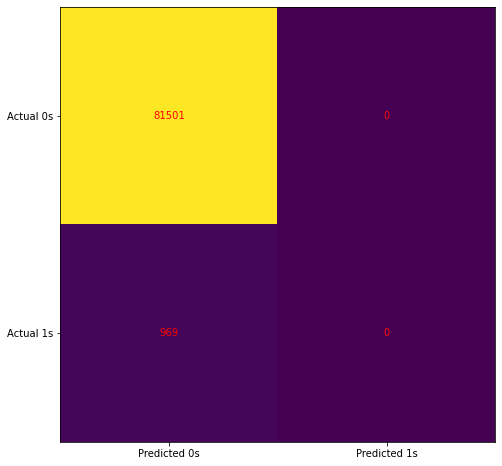

In [103]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [104]:
print(classification_report(y_test, model.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      0.99     81501
           Y       0.00      0.00      0.00       969

    accuracy                           0.99     82470
   macro avg       0.49      0.50      0.50     82470
weighted avg       0.98      0.99      0.98     82470



In [105]:
accuracy_score(y_test,predicted)

0.9882502728264824

In [106]:
accuracy_score(y_test,predicted, normalize=False)

81501

In [107]:
y_test.shape

(82470, 1)

In [108]:
temp=y_test.to_numpy()
for i in range(50):
    print(predicted[i],"   ",temp[i])

N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['Y']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['Y']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['Y']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']


In [109]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-109-894c3a7f4065>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
print(confusion_matrix(y_test,y_pred))

[[81501     0]
 [  969     0]]


In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.99      1.00      0.99     81501
           Y       0.00      0.00      0.00       969

    accuracy                           0.99     82470
   macro avg       0.49      0.50      0.50     82470
weighted avg       0.98      0.99      0.98     82470



In [114]:
print(accuracy_score(y_test, y_pred))

0.9882502728264824


In [122]:
def mfunc(X, y, typ):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    
    model = typ
    clf = model.fit(X_train, y_train)

    
    pred_labels = model.predict(X_test)

     
    print('Classes: ', clf.classes_) 
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) 
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) 
        
    
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
   
    print(classification_report(y_test, pred_labels))
    

    return X_train, X_test, y_train, y_test, clf, pred_labels

In [123]:
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X_data, y_data, GaussianNB())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classes:  ['N' 'Y']
Class Priors:  [0.98796819 0.01203181]
--------------------------------------------------------
Accuracy Score:  0.9878501273190251
--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      0.99     54312
           Y       0.00      0.00      0.00       668

    accuracy                           0.99     54980
   macro avg       0.49      0.50      0.50     54980
weighted avg       0.98      0.99      0.98     54980

